In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
# Retina display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from latexify import latexify, format_axes

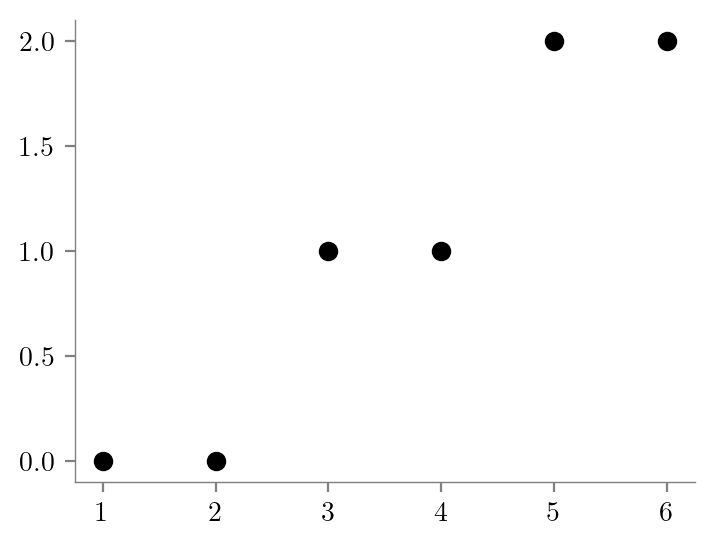

In [2]:
# Create dataset
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([0, 0, 1, 1, 2, 2])

# plot data
latexify()
plt.figure(figsize=(4, 3))
plt.scatter(x, y, color='k')
format_axes(plt.gca()) 
plt.savefig("../figures/decision-trees/ri-ro-dataset.pdf")
plt.show()

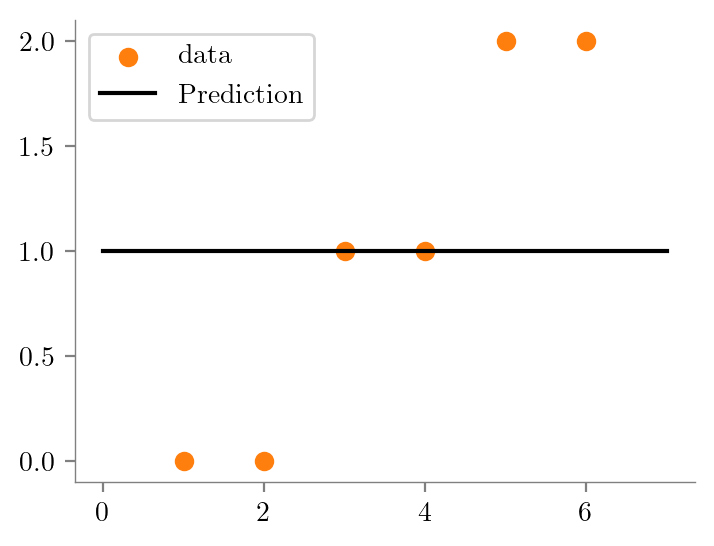

In [3]:
# Depth 0 tree
# Average of all y values
y_pred = np.mean(y)
# Plot data
latexify()
plt.figure(figsize=(4, 3))
plt.scatter(x, y, color='C1', label='data')
# Plot prediction
plt.plot([0, 7], [y_pred, y_pred], color='k', linestyle='-', label='Prediction')
format_axes(plt.gca())
plt.legend()
plt.savefig("../figures/decision-trees/ri-ro-depth-0.pdf")

In [4]:
from sklearn.tree import DecisionTreeRegressor

def create_DT_Regressor(x, y, depth, filename):
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(x.reshape(-1, 1), y)

    # Plot data
    plt.figure(figsize=(4, 3))
    latexify()
    plt.scatter(x, y, color='C1', label='Data')

    x_test = np.linspace(0, 7, 500)
    y_test = dt.predict(x_test.reshape(-1, 1))
    plt.plot(x_test, y_test, color='k', label='Prediction')
    format_axes(plt.gca())
    plt.legend()
    plt.savefig("../figures/decision-trees/"+filename+".pdf")
    return dt
    

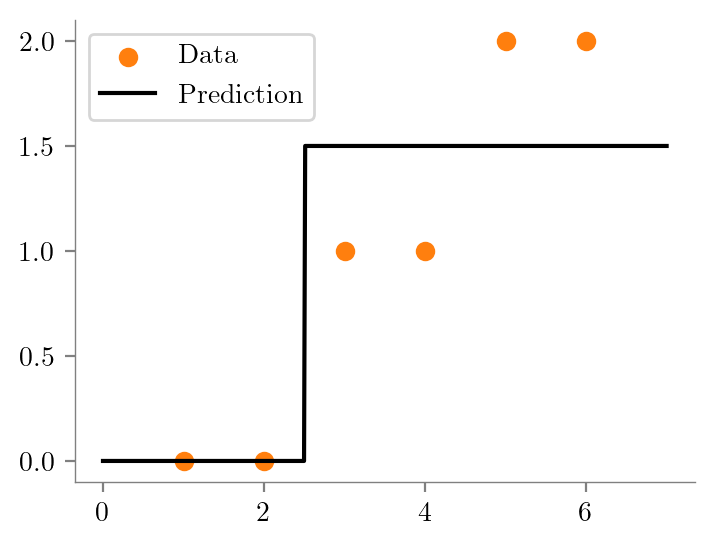

In [5]:
dt_one = create_DT_Regressor(x, y, 1, "ri-ro-depth-1")

In [6]:
from sklearn.tree import export_graphviz
import graphviz
def create_graph(dt, filename, feature_names=['x']):
    dot_data = export_graphviz(dt, out_file=None, feature_names=feature_names, filled=True)
    graph = graphviz.Source(dot_data)
    graph.format = 'pdf'
    graph.render("../figures/decision-trees/"+filename)

In [7]:
create_graph(dt_one, "ri-ro-depth-1-sklearn")

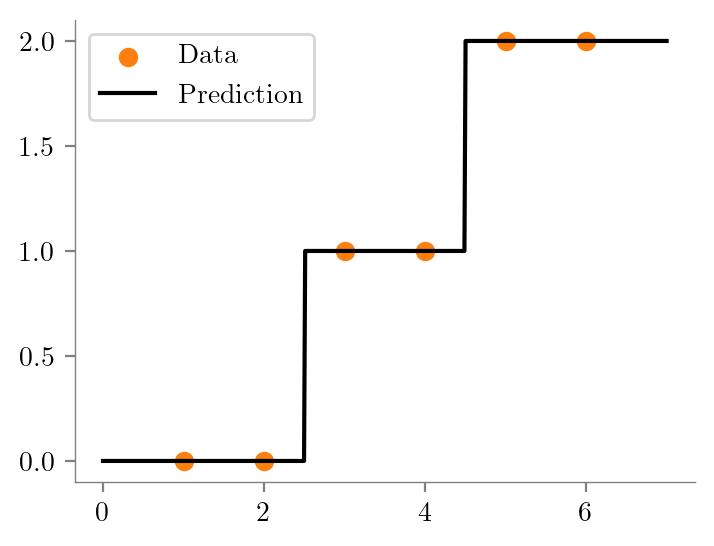

In [8]:
dt_two = create_DT_Regressor(x, y, 2, "ri-ro-depth-2")

In [9]:
create_graph(dt_two, "ri-ro-depth-2-sklearn")

Sine Dataset

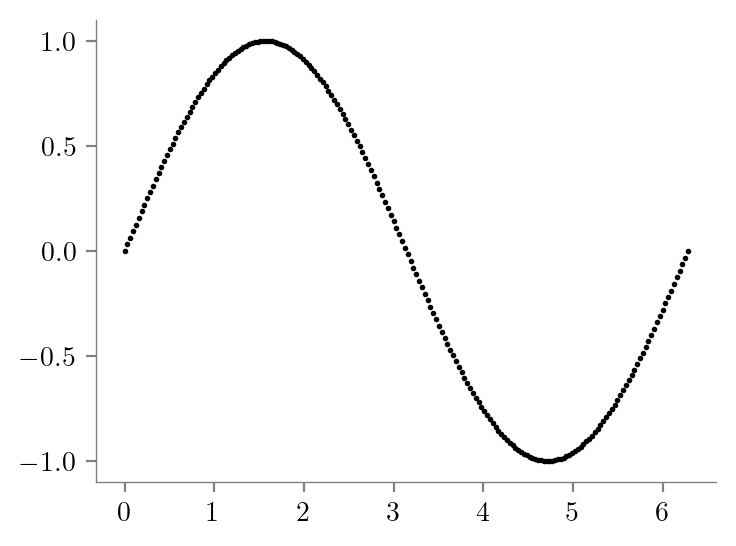

In [10]:
### Sine daatset
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

plt.figure(figsize=(4, 3))
latexify()
plt.scatter(x, y, color='k', s=1)
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/sine-dataset.pdf")

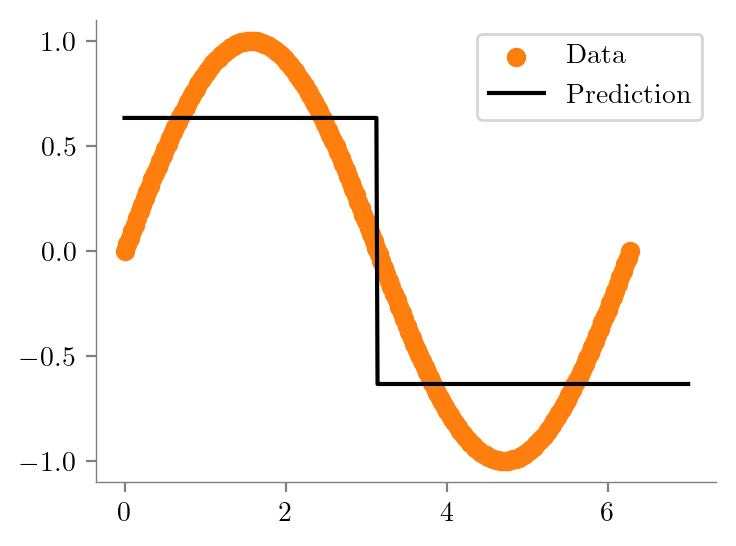

In [11]:
dt_sine_one = create_DT_Regressor(x, y, 1, "sine-depth-1")

In [12]:
create_graph(dt_sine_one, "sine-depth-1-sklearn")

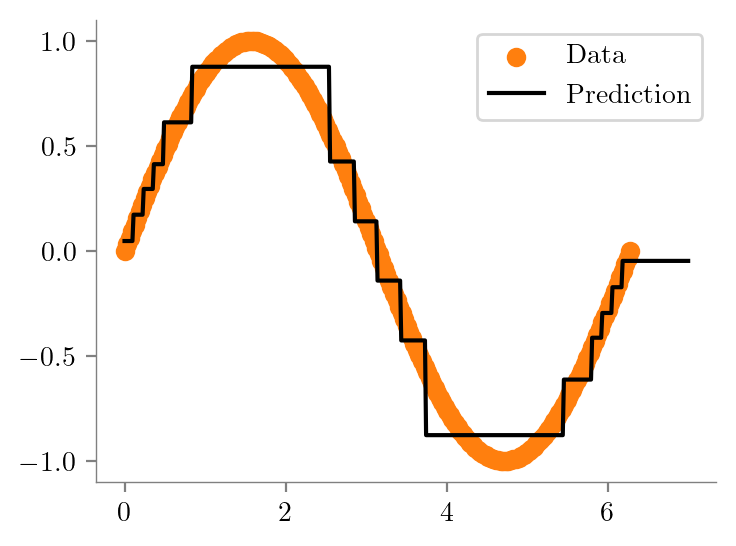

In [13]:
dt_sine_four = create_DT_Regressor(x, y, 4, "sine-depth-4")

Bias-Variance Tradeoff - Dataset I

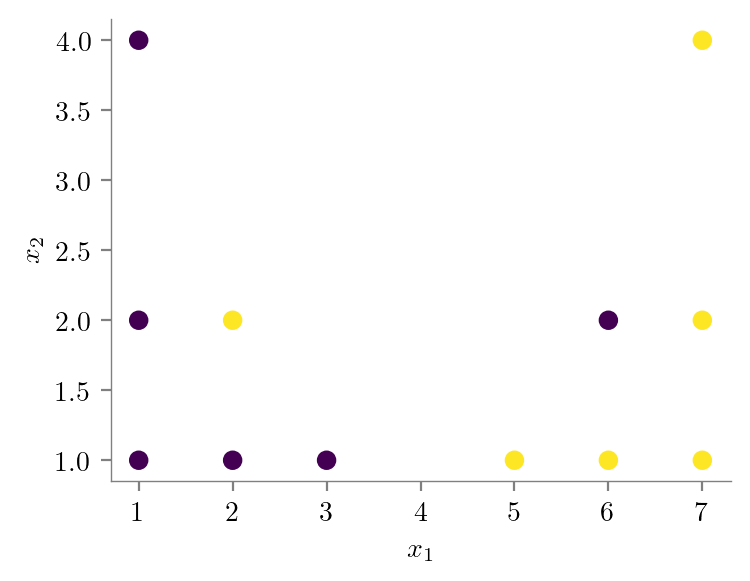

In [14]:
### Dataset for showing bias-variance tradeoff
X = np.array([[1, 1],[2, 1],[3, 1],[5, 1],
              [6, 1],[7, 1],[1, 2],[2, 2],
              [6, 2],[7, 2],[1, 4],[7, 4]])
y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1 ,0, 1])

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-dataset.pdf")

In [15]:
from sklearn.tree import DecisionTreeClassifier
def create_DT_Classifier(X,y,depth,filename):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X, y)

    # Predict in entire 2d space and contour plot
    x1 = np.linspace(0, 8, 100)
    x2 = np.linspace(0, 5, 100)

    X1, X2 = np.meshgrid(x1, x2)
    X_test = np.stack([X1.flatten(), X2.flatten()], axis=1)
    y_test = dt.predict(X_test)
    plt.figure(figsize=(4, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.contourf(X1, X2, y_test.reshape(X1.shape), alpha=0.1, cmap='coolwarm')
    format_axes(plt.gca())
    plt.savefig("../figures/decision-trees/"+filename+".pdf")
    return dt

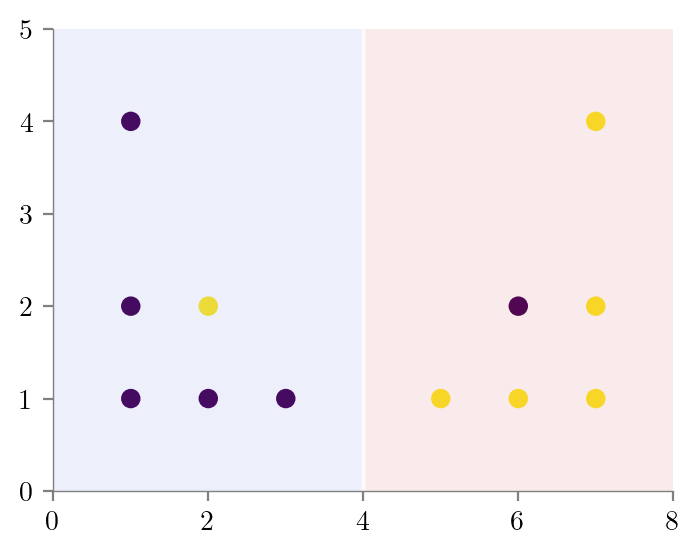

In [16]:
dt_bias_variance_one = create_DT_Classifier(X, y, 1, "bias-variance-depth-1")

In [17]:
create_graph(dt_bias_variance_one, "bias-variance-depth-1-sklearn", feature_names=['x1', 'x2'])

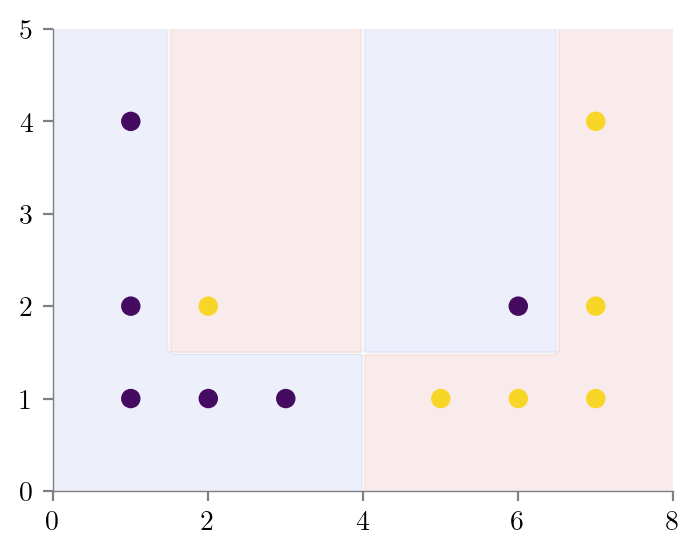

In [18]:
dt_bias_variance_full_depth = create_DT_Classifier(X, y, None, "bias-variance-full-depth")

In [19]:
create_graph(dt_bias_variance_full_depth, "bias-variance-full-depth-sklearn", feature_names=['x1', 'x2'])

Bias-Variance Tradeoff - Dataset II

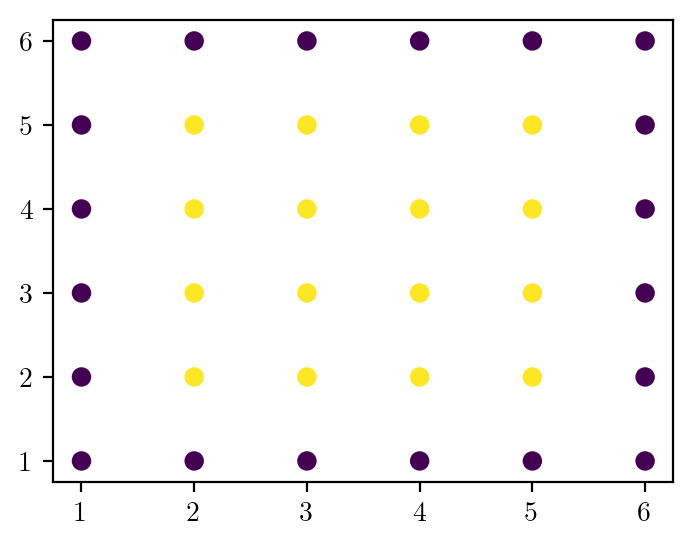

In [20]:
# Bias variance dataset 2
# X is all integers from (1, 1) to (6, 6)
X = np.array([[i, j] for i in range(1, 7) for j in range(1, 7)])
y = np.zeros(len(X), dtype=int)
y[(2 <= X[:, 0]) & (X[:, 0] <= 5) & (2 <= X[:, 1]) & (X[:, 1] <= 5)] = 1
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=y)

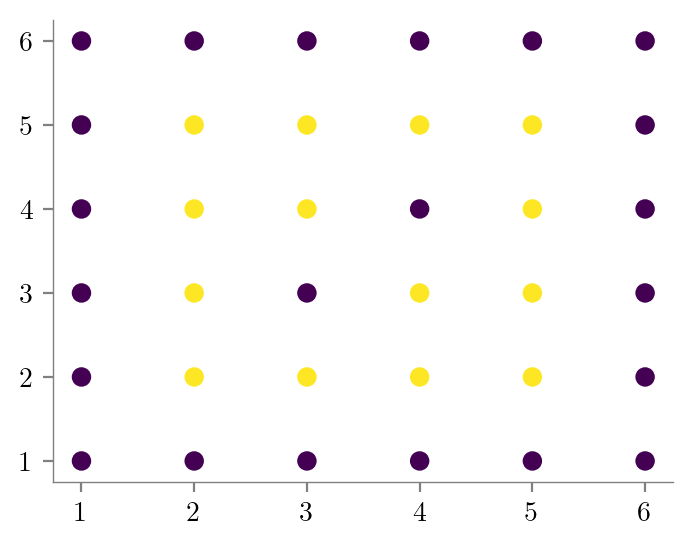

In [21]:
special_condition = (X[:, 0] == 3) & (X[:, 1] == 3) | (X[:, 0] == 4) & (X[:, 1] == 4)
y[special_condition] = 0

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=y) 
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-dataset-2.pdf")

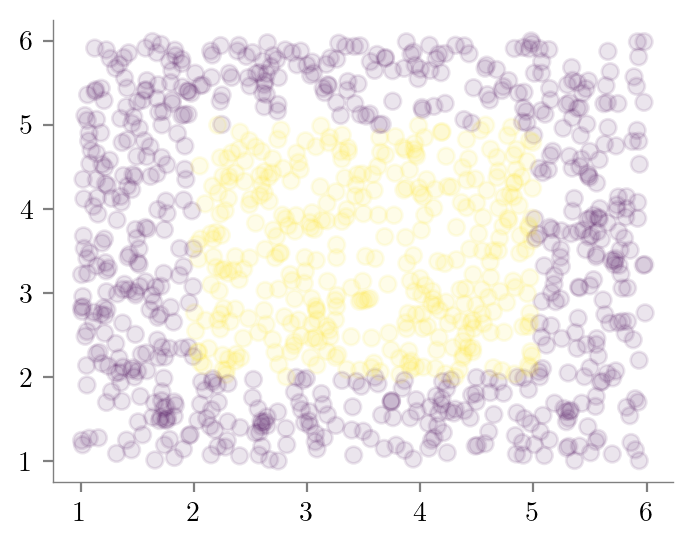

In [22]:
# X_test random uniform frmo (1, 1) to (6, 6) of size 1000
X_test = np.random.uniform(1, 6, size=(1000, 2))
y_test = np.zeros(len(X_test), dtype=int)
y_test[(2 <= X_test[:, 0]) & (X_test[:, 0] <= 5) & (2 <= X_test[:, 1]) & (X_test[:, 1] <= 5)] = 1

plt.figure(figsize=(4, 3))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.1)
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-dataset-2-test.pdf")

In [23]:
def create_DT_Classifier_with_graph(X,y,depth,filename):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X, y)

    # Predict in entire 2d space and contour plot
    x1 = np.linspace(0.5, 6.5, 100)
    x2 = np.linspace(0.5, 6.5, 100)

    X1, X2 = np.meshgrid(x1, x2)
    X_contour = np.stack([X1.flatten(), X2.flatten()], axis=1)
    y_contour = dt.predict(X_contour)
    plt.figure(figsize=(4, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.contourf(X1, X2, y_contour.reshape(X1.shape), alpha=0.1, cmap='coolwarm')
    format_axes(plt.gca())
    plt.savefig("../figures/decision-trees/" + filename + ".pdf")

    # Export tree
    dot_data = export_graphviz(dt, out_file=None, feature_names=['x1', 'x2'], filled=True)
    graph = graphviz.Source(dot_data)
    graph.format = 'pdf'
    graph.render("../figures/decision-trees/"+filename+"-sklearn")

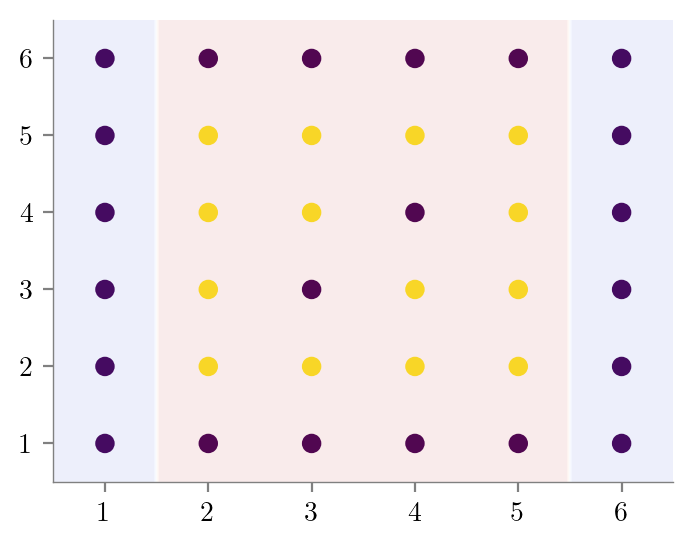

In [24]:
#Underfitting
create_DT_Classifier_with_graph(X, y, 2, "bias-variance-depth-2")

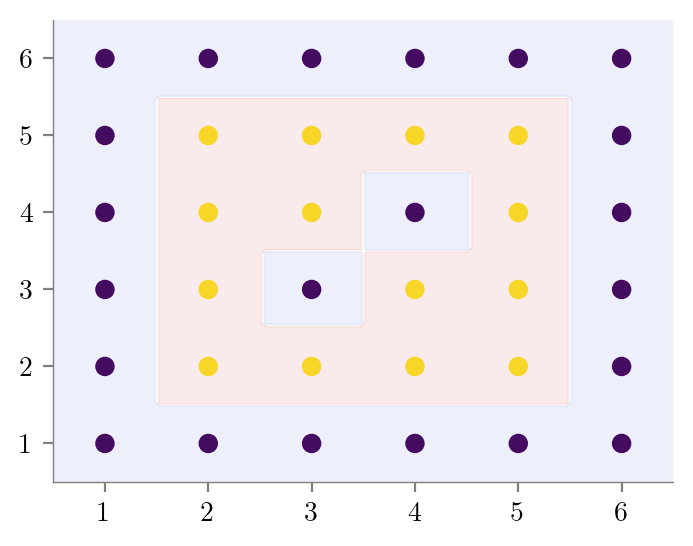

In [25]:
#Overfitting
create_DT_Classifier_with_graph(X, y, None, "bias-variance-full-depth")

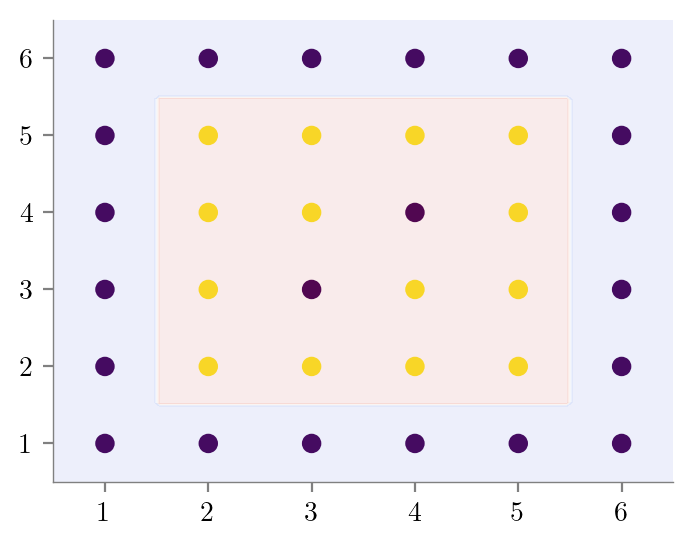

In [26]:
#Good Fit
create_DT_Classifier_with_graph(X, y, 4, "bias-variance-good-fit")

Test Accuracies

In [27]:
from sklearn.metrics import accuracy_score
### Train and test accuracy vs depth
depths = np.arange(2, 10)
train_accs = {}
test_accs = {}
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X, y)
    train_accs[depth] = accuracy_score(y, dt.predict(X))
    test_accs[depth] = accuracy_score(y_test, dt.predict(X_test))

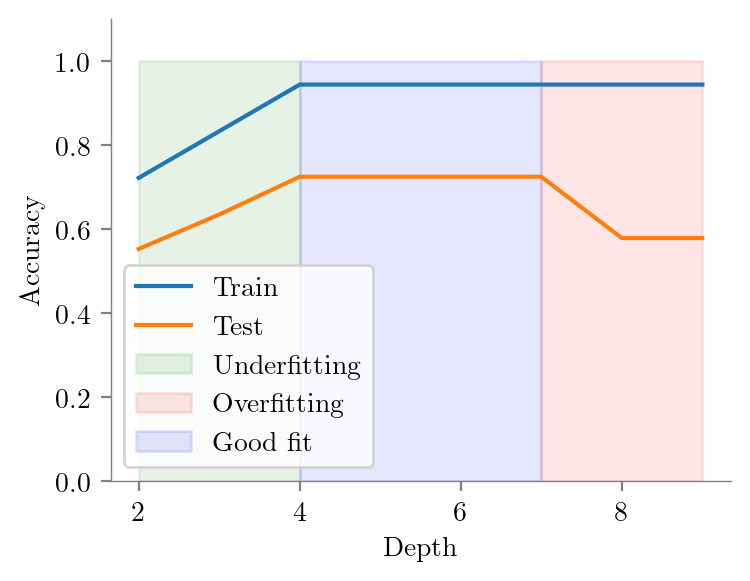

In [28]:
train_accs = pd.Series(train_accs)
test_accs = pd.Series(test_accs)

plt.figure(figsize=(4, 3))
plt.plot(depths, train_accs, label='Train')
plt.plot(depths, test_accs, label='Test')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim(0, 1.1)
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-accuracy-vs-depth.pdf")

# Highlight area of underfitting (depth < 4) fill with green 
plt.fill_between(depths, 0, 1, where=depths <= 4, color='g', alpha=0.1, label='Underfitting')
plt.legend()
plt.savefig("../figures/decision-trees/bias-variance-accuracy-vs-depth-underfitting.pdf")


# Highlight area of overfitting (depth >7 4) fill with red
plt.fill_between(depths, 0, 1, where=depths >= 7, color='r', alpha=0.1, label='Overfitting')
plt.legend()
plt.savefig("../figures/decision-trees/bias-variance-accuracy-vs-depth-overfitting.pdf")


# Highlight good fit area (4 < depth < 7) fill with blue
plt.fill_between(depths, 0, 1, where=(depths >= 4) & (depths <= 7), color='b', alpha=0.1, label='Good fit')
plt.legend()
plt.savefig("../figures/decision-trees/bias-variance-accuracy-vs-depth-good-fit.pdf")

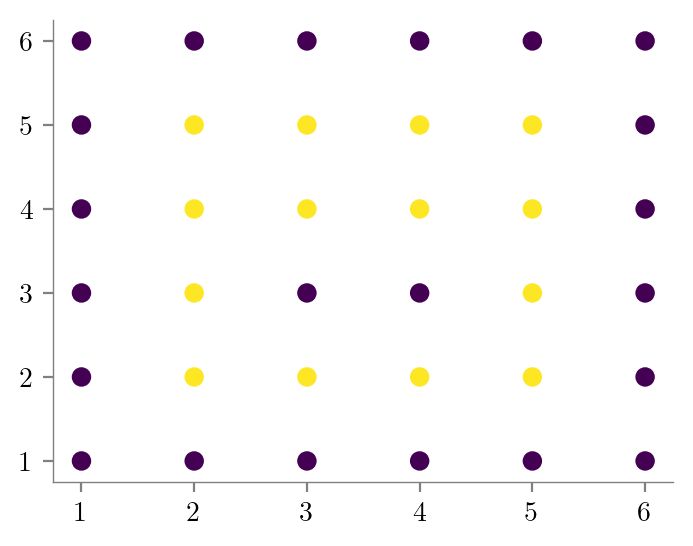

In [29]:
# Slight variation of the dataset leads to a completely different tree
y = np.zeros(len(X), dtype=int)
y[(2 <= X[:, 0]) & (X[:, 0] <= 5) & (2 <= X[:, 1]) & (X[:, 1] <= 5)] = 1
special_condition = (X[:, 0] == 3) & (X[:, 1] == 3) | (X[:, 0] == 4) & (X[:, 1] == 3)
y[special_condition] = 0

plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=y)
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-dataset-2-2.pdf")

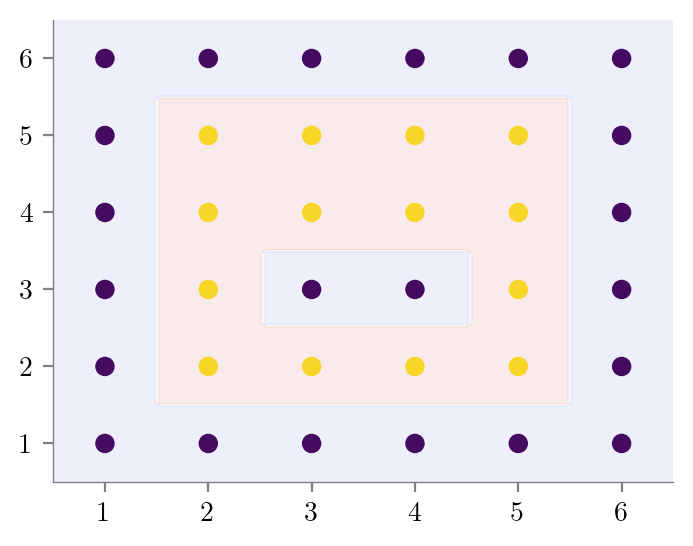

In [30]:
create_DT_Classifier_with_graph(X, y, None, "bias-variance-full-depth-2")